## Setup

In [1]:
import os
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [3]:
df = pd.read_csv('../data/cleaned_data.csv')
df

Question_1  Question_2  Question_3  Question_4  Question_5  Question_6  \
0             1           1           1           1           0           0   
1             1           1           0           1           0           0   
2             1           1           0           1           1           0   
3             1           1           0           1           0           0   
4             1           1           1           1           1           0   
..          ...         ...         ...         ...         ...         ...   
604           1           1           1           1           1           1   
605           0           1           0           1           1           0   
606           1           0           0           0           0           0   
607           1           0           0           1           1           0   
608           1           0           1           1           1           0   

     Question_7  Question_8  Question_9  Question_10   age gender  \
0             1           1           0            0  26.0      f   
1             0           1           0            1  24.0      m   
2             1           1           1            1  27.0      m   
3             1           1           0            1  35.0      f   
4             1           1           1            1  36.0      m   
..          ...         ...         ...          ...   ...    ...   
604           1           1           1            1  27.0      f   
605           1           1           1            1  25.0      f   
606           0           1           0            1  34.0      m   
607           1           0           1            1  35.0      m   
608           1           1           1            1  26.0      f   

          ethnicity  Born_with_jaundice  Family_member_with_ASD  \
0    White-European                   0                       0   
1            Latino                   0                       1   
2            Latino                   1                       1   
3    White-European                   0                       1   
4            Others                   1                       0   
..              ...                 ...                     ...   
604        Pasifika                   0                       0   
605  White-European                   0                       0   
606        Hispanic                   0                       0   
607     South Asian                   0                       0   
608  White-European                   0                       0   

    Country_of_residence  Used_screening_app  Screening_result  \
0          United States                   0               6.0   
1                 Brazil                   0               5.0   
2                  Spain                   0               8.0   
3          United States                   0               6.0   
4          United States                   0               9.0   
..                   ...                 ...               ...   
604            Australia                   0              10.0   
605               Russia                   0               7.0   
606               Mexico                   0               3.0   
607             Pakistan                   0               6.0   
608               Cyprus                   0               8.0   

    Relation_to_test  ASD_Class  
0               Self          0  
1               Self          0  
2             Parent          1  
3               Self          0  
4               Self          1  
..               ...        ...  
604             Self          1  
605             Self          1  
606           Parent          0  
607             Self          0  
608             Self          1  

[609 rows x 20 columns]

## Trees and Forests

Decision Tree Accuracy: 91.80%


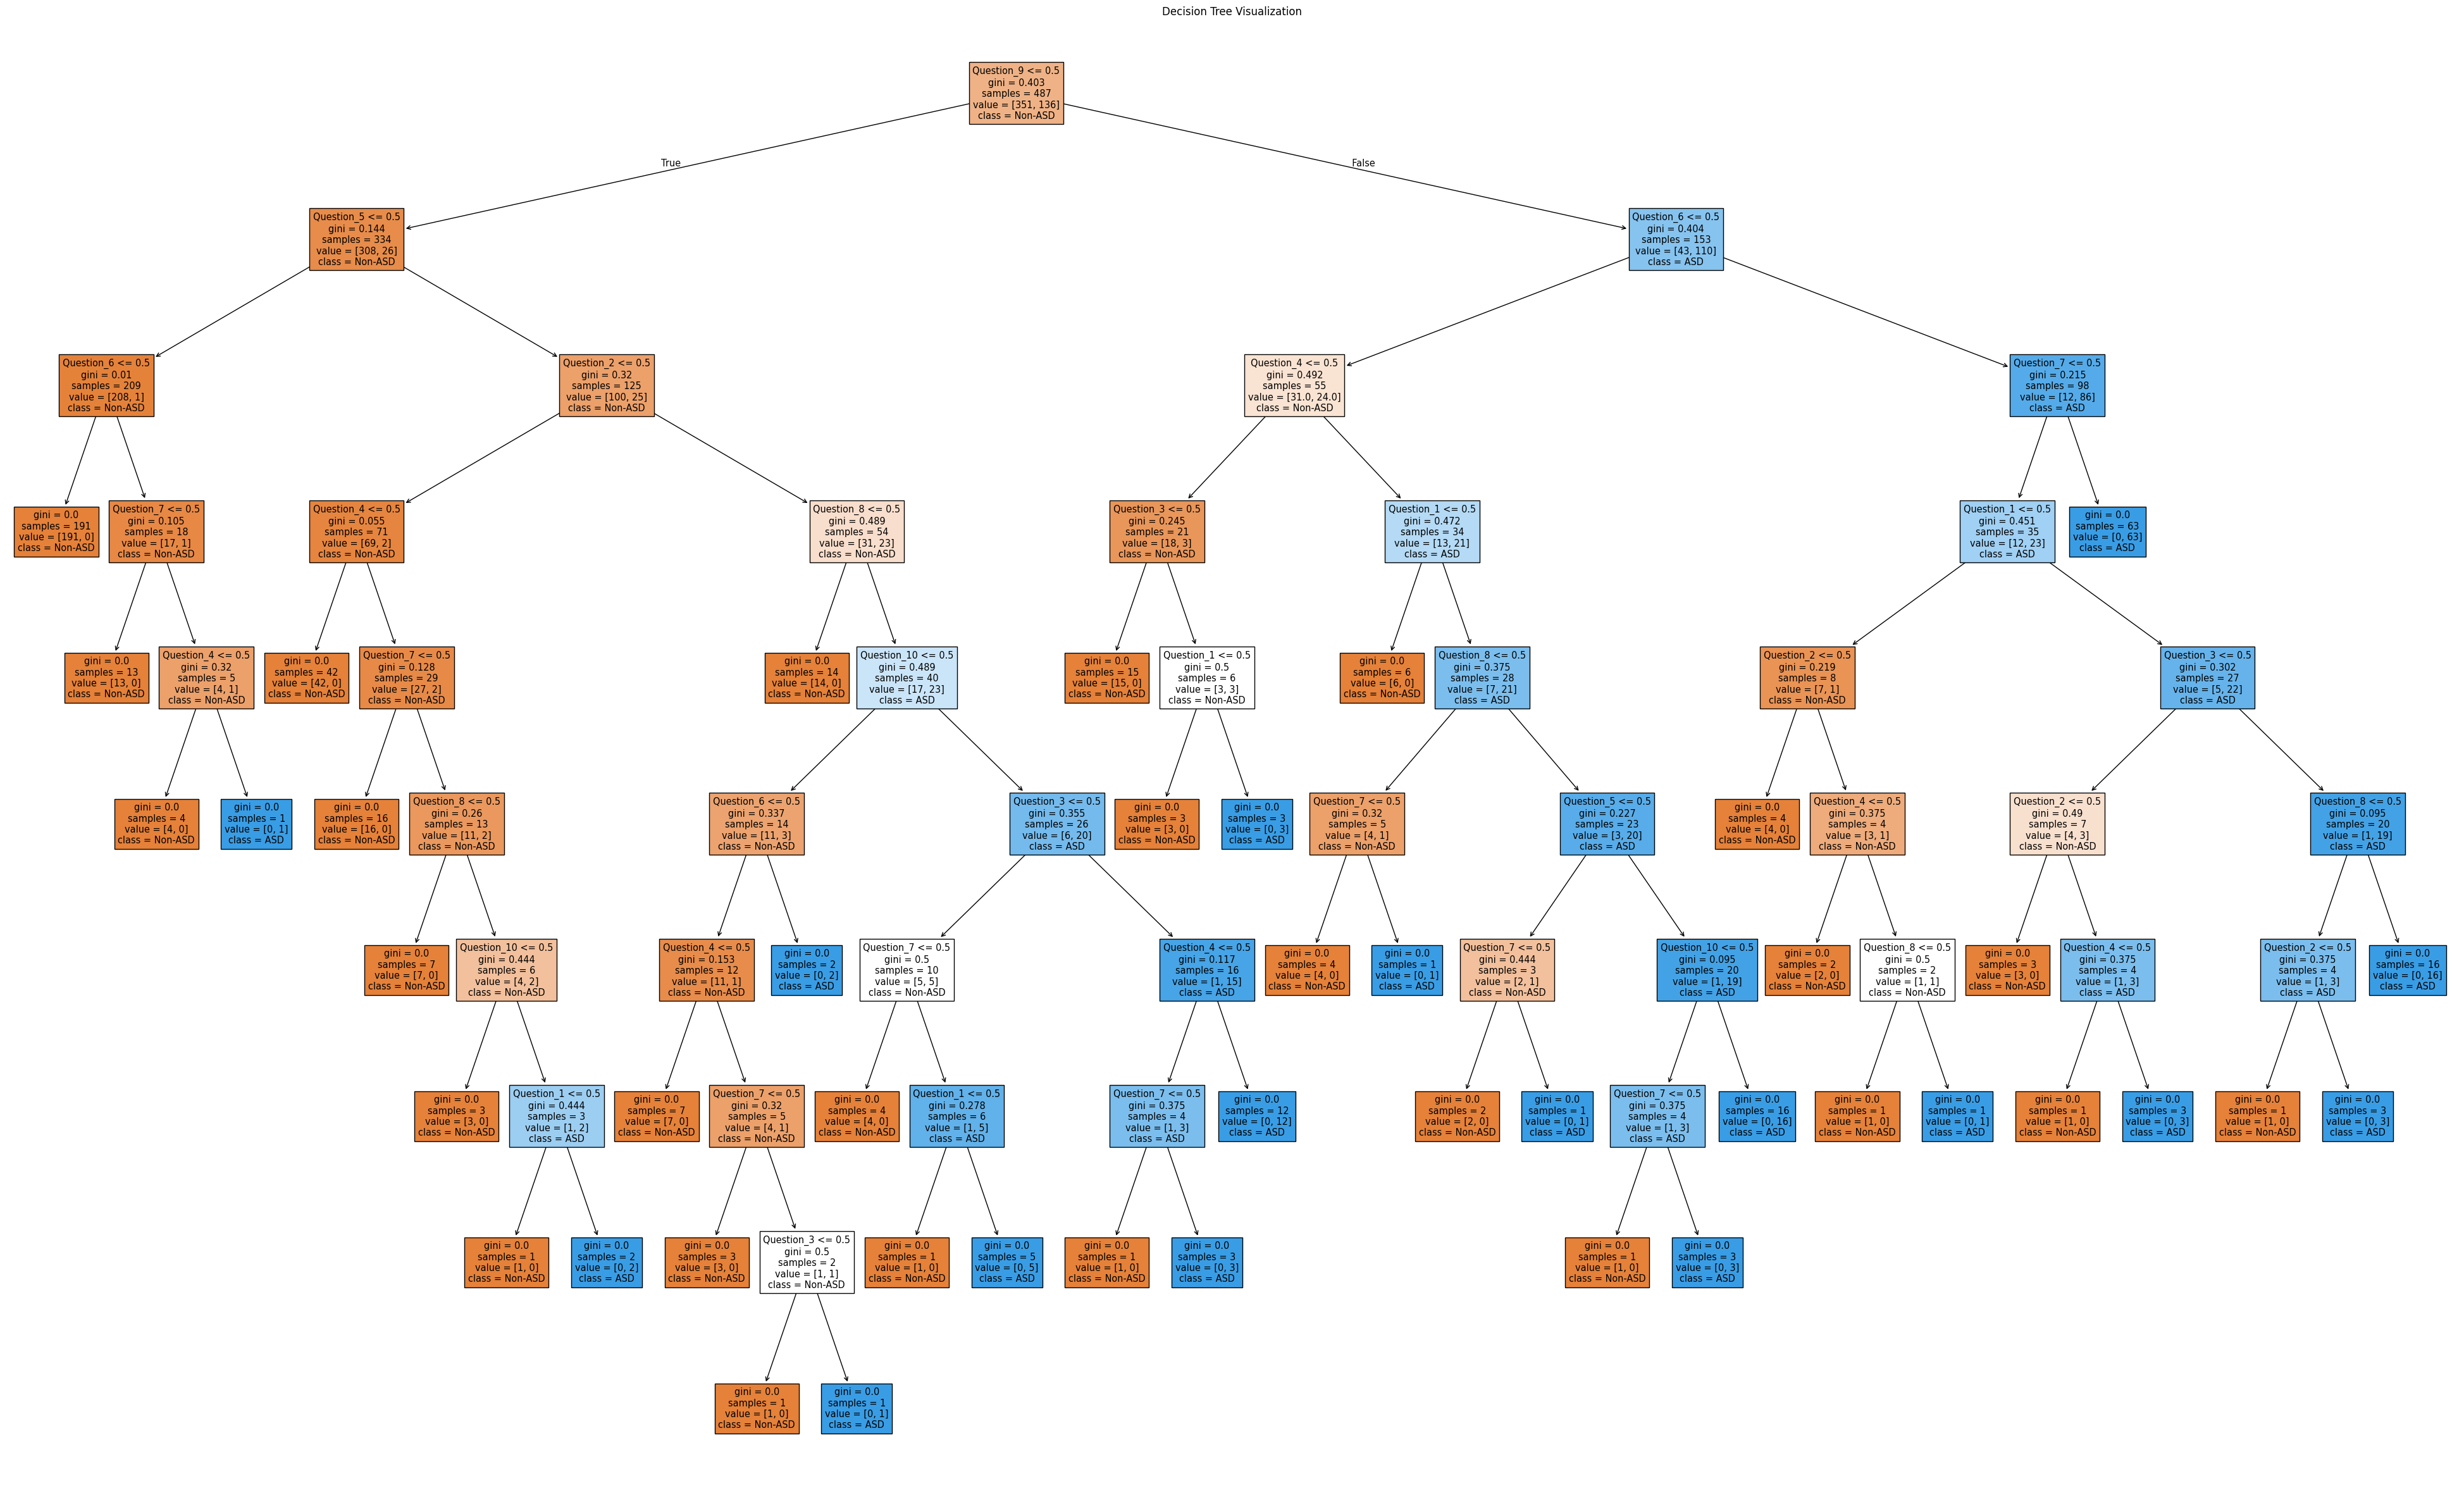

In [5]:
feature_list = ['Question_1', 'Question_2', 'Question_3', 'Question_4', 'Question_5', 'Question_6', 'Question_7', 'Question_8', 'Question_9', 'Question_10']
target_names = ['ASD_Class']
X = df[feature_list]
y = df[target_names]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")
plt.figure(figsize=(50, 30))
plot_tree(clf, filled=True, feature_names=feature_list, class_names=np.array(['Non-ASD', 'ASD']))
plt.title("Decision Tree Visualization")
plt.savefig('../plots/decision_tree.png')

In [6]:
y_test.shape

(122, 1)

In [7]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, np.ravel(y_train))
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL: 0.9918032786885246


In [8]:
clf = RandomForestClassifier(criterion='entropy', n_estimators = 100)
clf.fit(X_train, np.ravel(y_train))
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL: 0.9590163934426229


In [9]:
clf = RandomForestClassifier(criterion='log_loss', n_estimators = 100)
clf.fit(X_train, np.ravel(y_train))
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL: 0.9836065573770492


## hyperparameter tuning

In [10]:
forests_across_criterions = []
accuracies_across_criterions = []
criterions = ['gini', 'entropy', 'log_loss']
for criterion in criterions:
    accuracies_across_depth = []
    forests_across_depths = []
    for depth in range(1, 100):
        clf = RandomForestClassifier(criterion=criterion, max_depth=depth, n_estimators = 100)
        clf.fit(X_train, np.ravel(y_train))
        y_pred = clf.predict(X_test)
        accuracies_across_depth.append(metrics.accuracy_score(y_test, y_pred))
        forests_across_depths.append(clf)

    accuracies_across_criterions.append(accuracies_across_depth)
    forests_across_criterions.append(forests_across_depths)

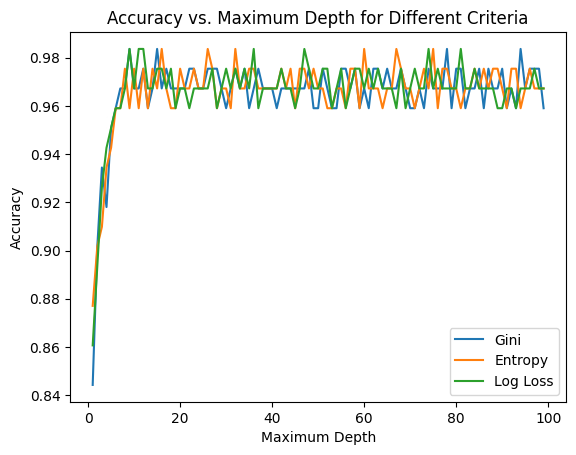

In [11]:
plt.plot(range(1, 100), accuracies_across_criterions[0], label='Gini')
plt.plot(range(1, 100), accuracies_across_criterions[1], label='Entropy')
plt.plot(range(1, 100), accuracies_across_criterions[2], label='Log Loss')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Maximum Depth for Different Criteria')
plt.legend()
plt.savefig('../plots/accuracy_vs_depth.png')

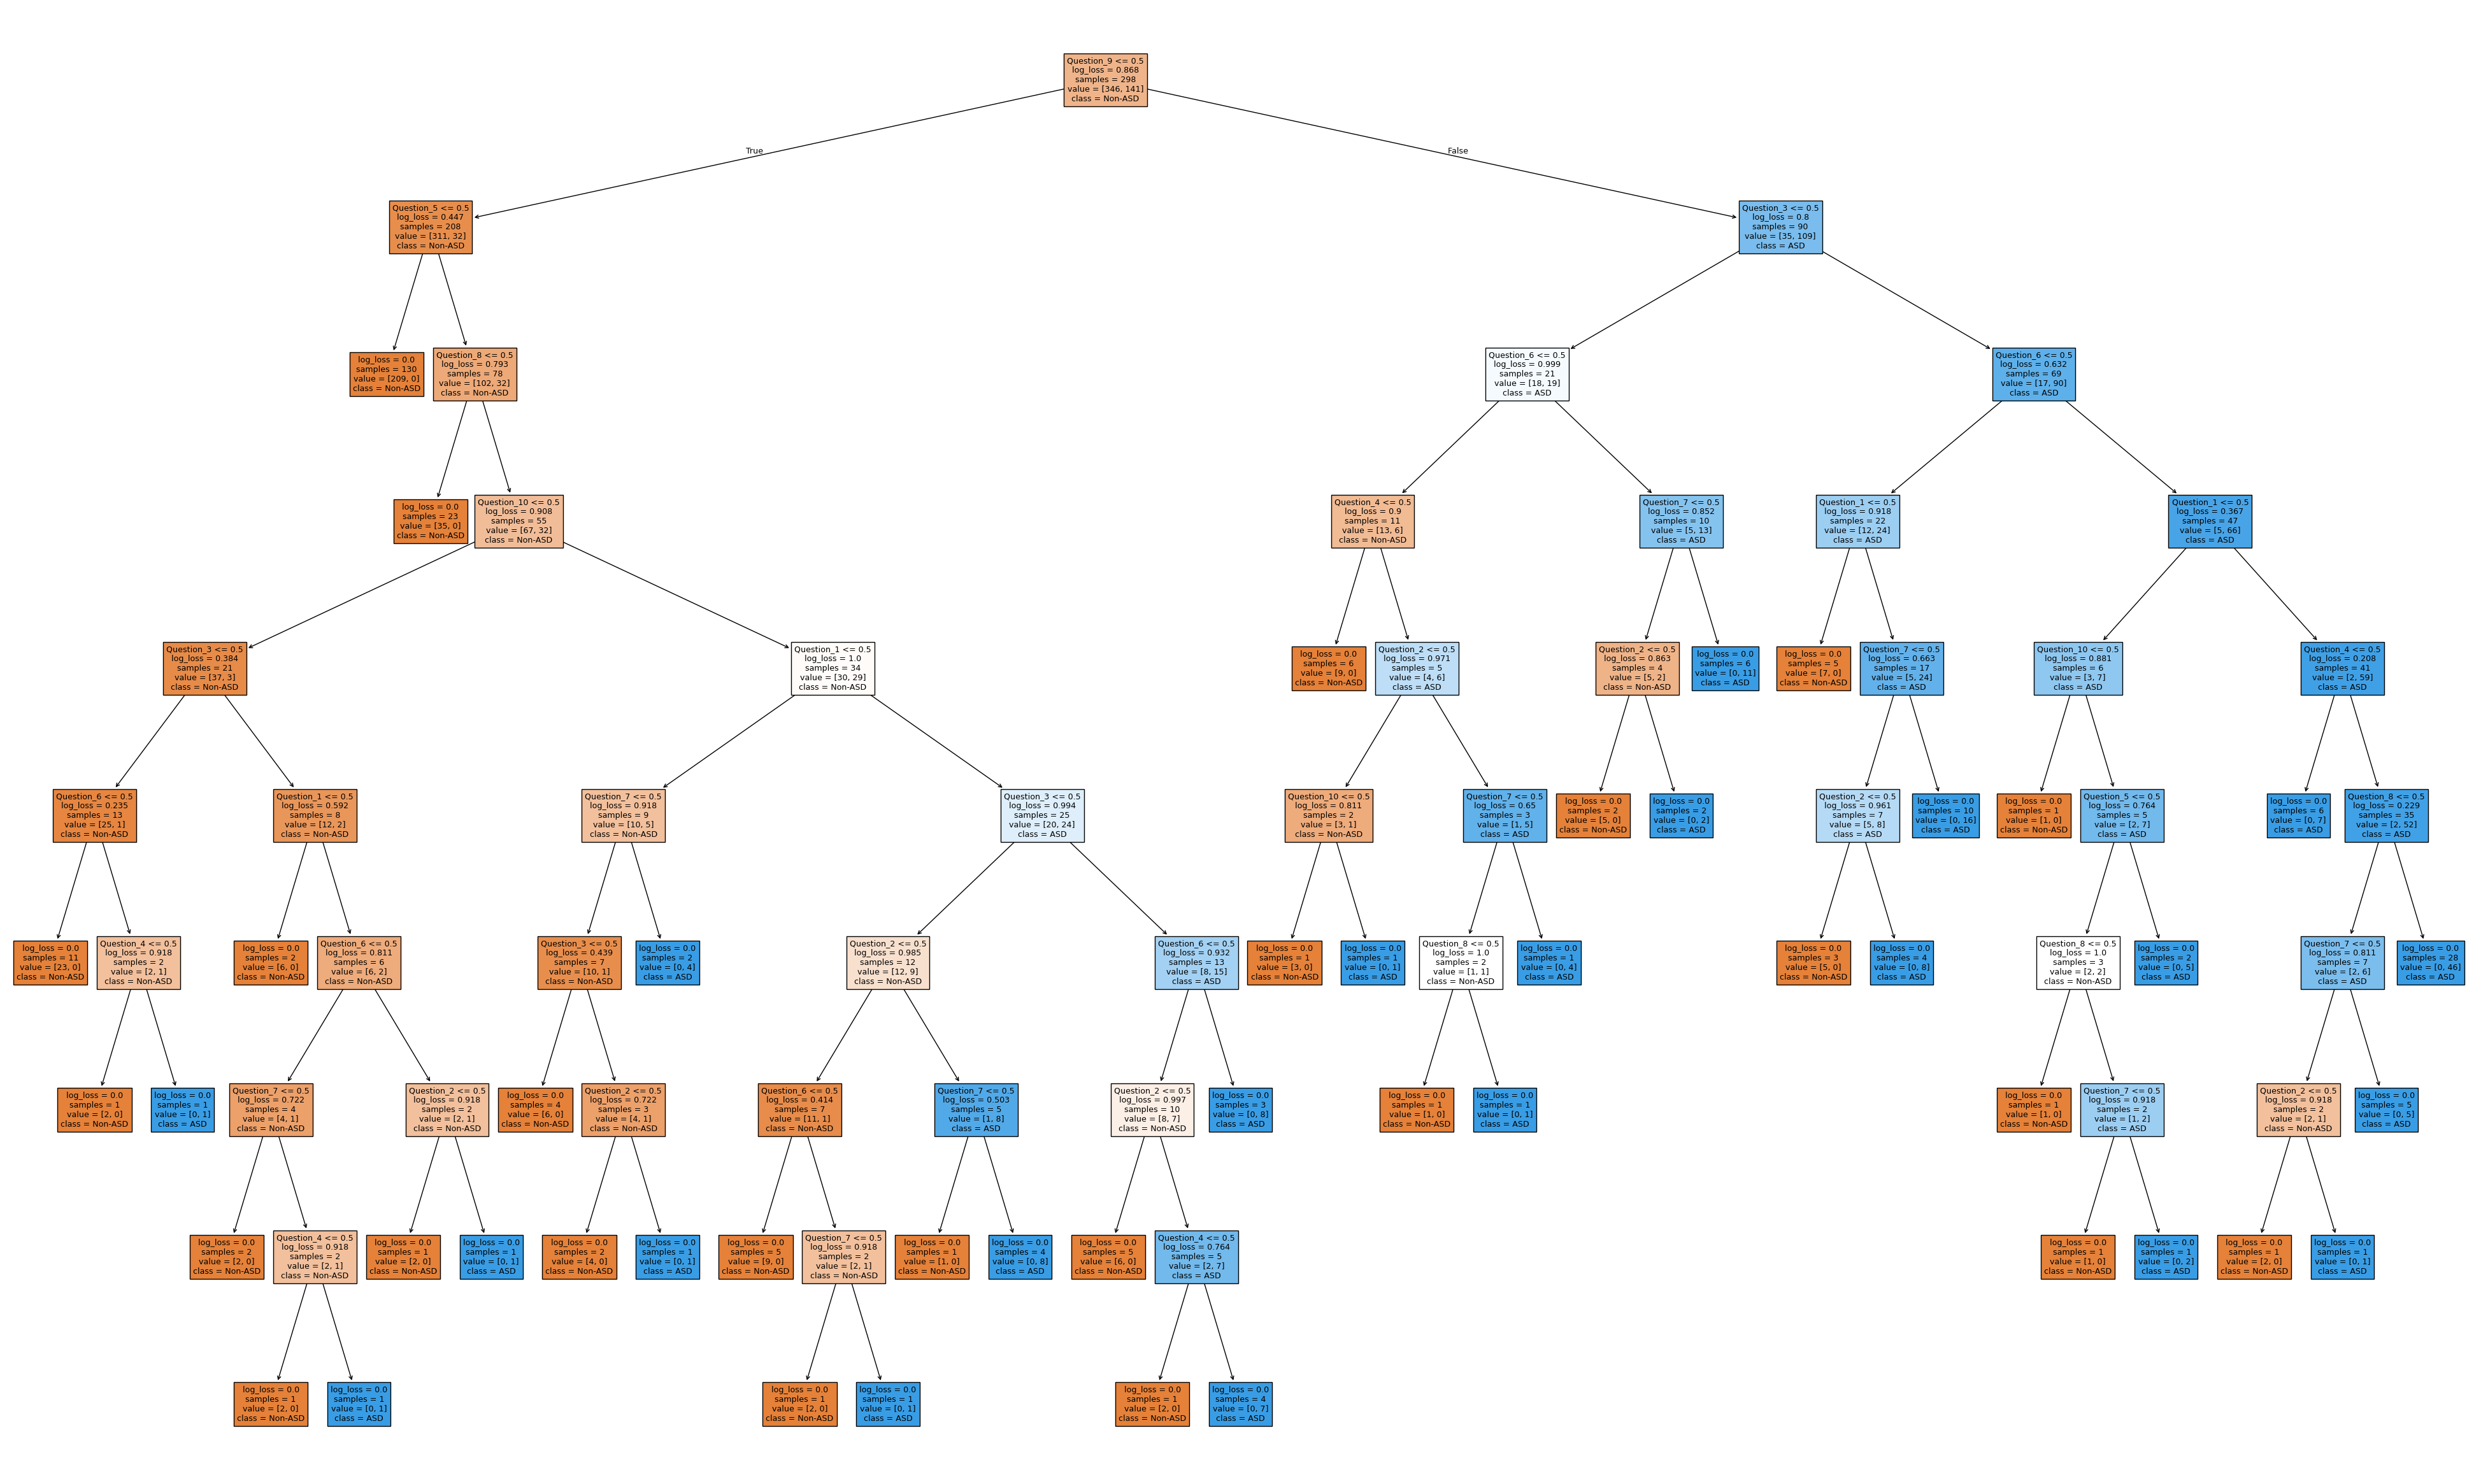

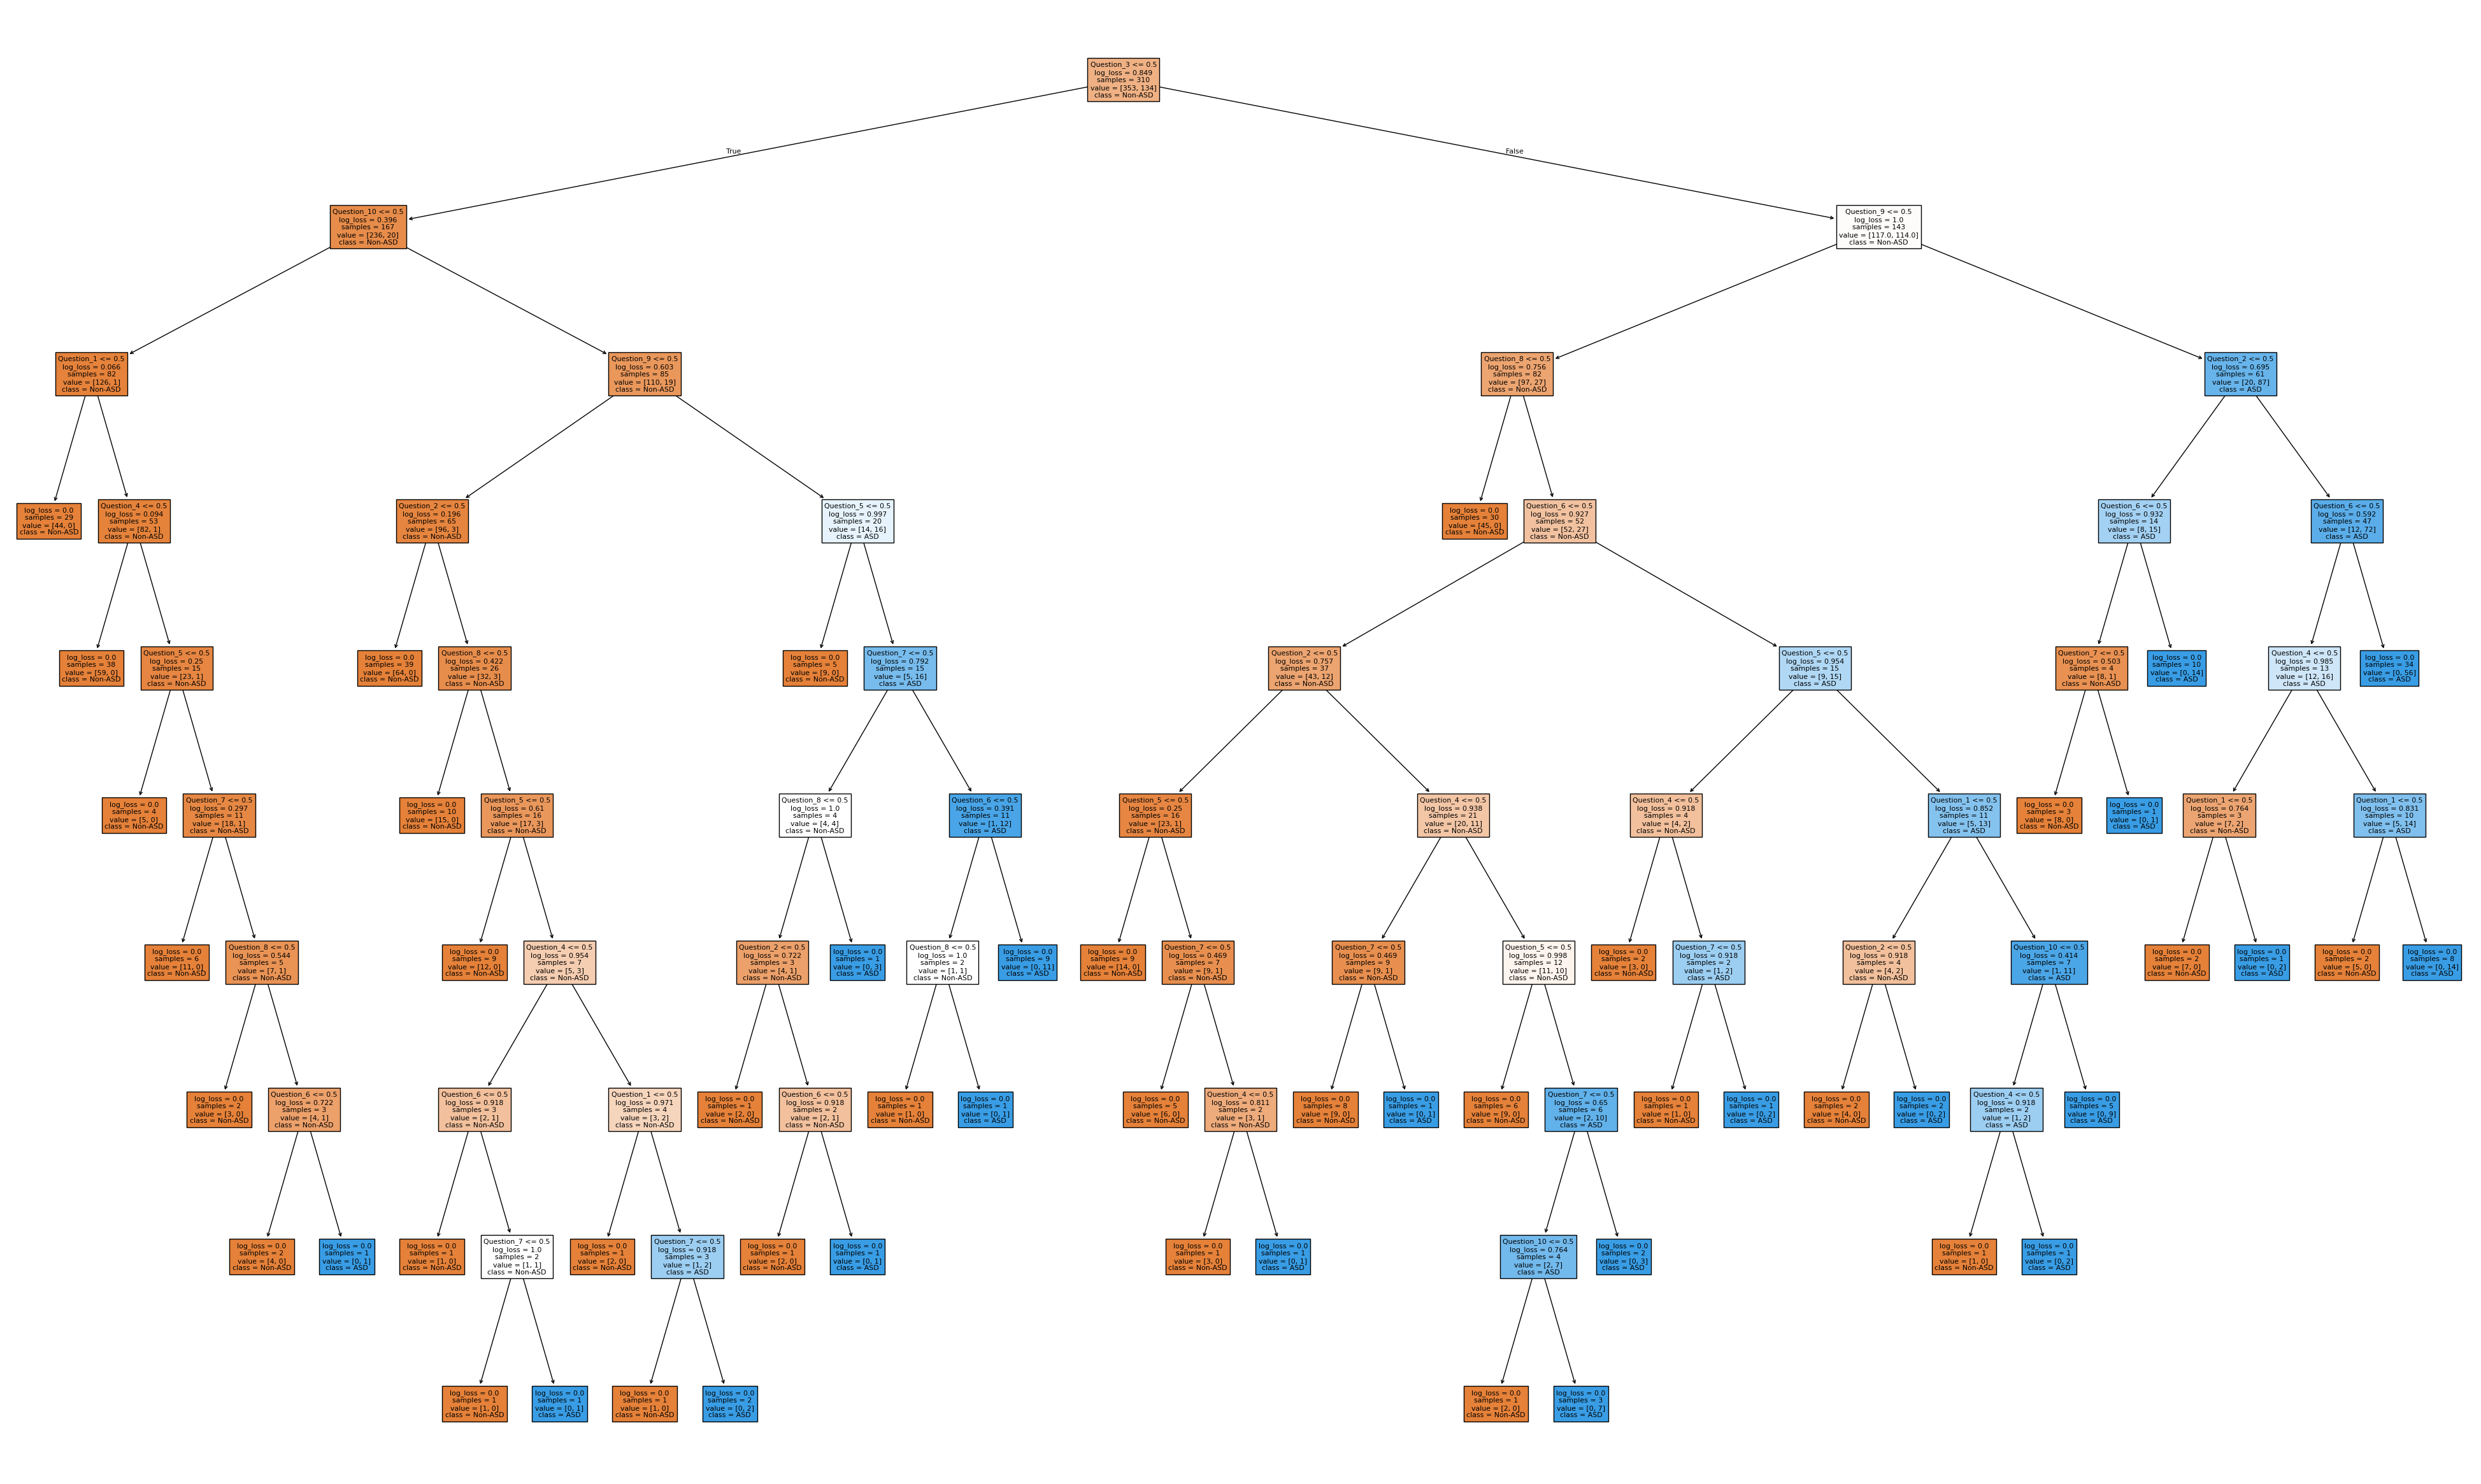

In [12]:
plt.figure(figsize=(50, 30))
plot_tree(clf[0], filled=True, feature_names=feature_list, class_names=np.array(['Non-ASD', 'ASD']))
plt.show()

plt.figure(figsize=(50, 30))
plot_tree(clf[1], filled=True, feature_names=feature_list, class_names=np.array(['Non-ASD', 'ASD']))
plt.show()

In [13]:
max_depth_in_forests = []
for forests_of_criterion in forests_across_criterions:
    max_depth = 0
    for forest in forests_of_criterion:
        for tree in forest.estimators_:
            max_depth = max(max_depth, tree.get_depth())
    max_depth_in_forests.append(max_depth)

print('Maximum depth in forests for Gini Criterion:', max_depth_in_forests[0])
print('Maximum depth in forests for Entropy Criterion:', max_depth_in_forests[1])
print('Maximum depth in forests for Log Loss Criterion:', max_depth_in_forests[2])

Maximum depth in forests for Gini Criterion: 10
Maximum depth in forests for Entropy Criterion: 10
Maximum depth in forests for Log Loss Criterion: 10


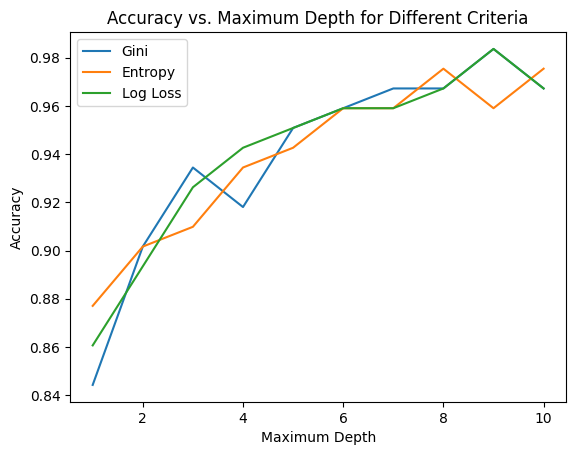

In [15]:
plt.plot(range(1, 11), accuracies_across_criterions[0][0:10], label='Gini')
plt.plot(range(1, 11), accuracies_across_criterions[1][0:10], label='Entropy')
plt.plot(range(1, 11), accuracies_across_criterions[2][0:10], label='Log Loss')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Maximum Depth for Different Criteria')
plt.legend()
plt.savefig('../plots/accuracy_vs_depth.png')

In [16]:
max_acc_indexes = []
for i, criterion_acc in enumerate(accuracies_across_criterions):
    max_acc_indexes = np.where(np.array(criterion_acc) == np.max(criterion_acc))[0]
    print(f'for criterion {criterions[i]}, maximum accuracy is achieved at depth: {max_acc_indexes + 1}')

for criterion gini, maximum accuracy is achieved at depth: [ 9 15 78 94]
for criterion entropy, maximum accuracy is achieved at depth: [16 26 32 60 67 75]
for criterion log_loss, maximum accuracy is achieved at depth: [ 9 11 12 36 47 74 81]


In [17]:
max_acc_indexes = []
for i, criterion_acc in enumerate(accuracies_across_criterions):
    max_acc_indexes = np.where(np.array(criterion_acc[:max_depth_in_forests[i]]) == np.max(criterion_acc[:max_depth_in_forests[i]]))[0]
    print(f'for criterion {criterions[i]}, maximum accuracy is achieved at depth: {max_acc_indexes + 1}')

for criterion gini, maximum accuracy is achieved at depth: [9]
for criterion entropy, maximum accuracy is achieved at depth: [ 8 10]
for criterion log_loss, maximum accuracy is achieved at depth: [9]


----------------------------------
Experiment 1 in progress...


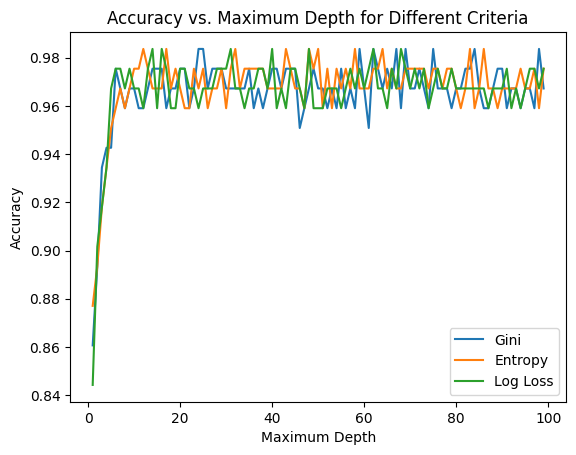

Maximum depth in forests for Gini Criterion: 10
Maximum depth in forests for Entropy Criterion: 10
Maximum depth in forests for Log Loss Criterion: 10


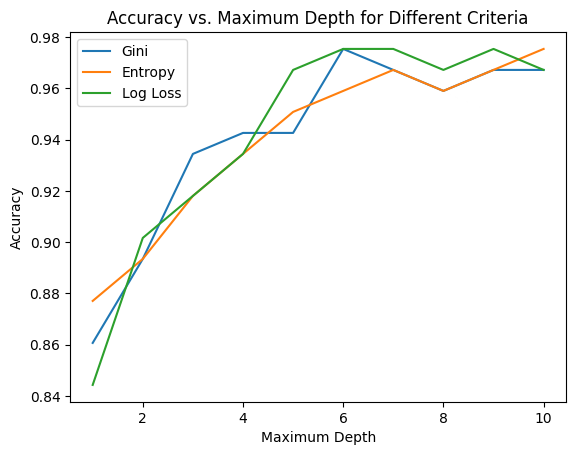

for criterion gini, maximum accuracy is achieved at depth: [24 25 59 62 67 69 75 84 98]
for criterion entropy, maximum accuracy is achieved at depth: [12 17 32 43 48 50 58 64 83 86]
for criterion log_loss, maximum accuracy is achieved at depth: [14 16 31 40 48 62 68]
for criterion gini, maximum accuracy is achieved at depth: [6]
for criterion entropy, maximum accuracy is achieved at depth: [10]
for criterion log_loss, maximum accuracy is achieved at depth: [6 7 9]
----------------------------------
Experiment 2 in progress...


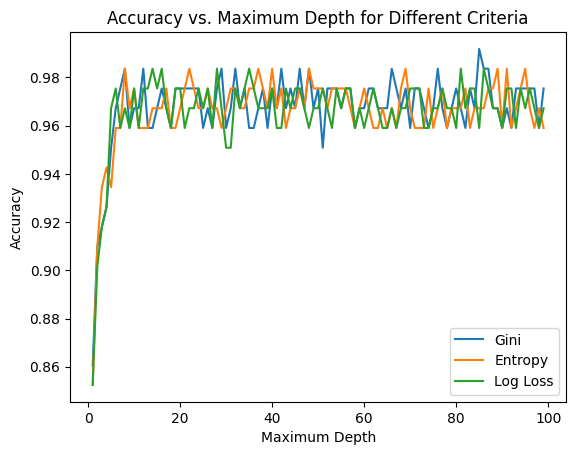

Maximum depth in forests for Gini Criterion: 10
Maximum depth in forests for Entropy Criterion: 10
Maximum depth in forests for Log Loss Criterion: 10


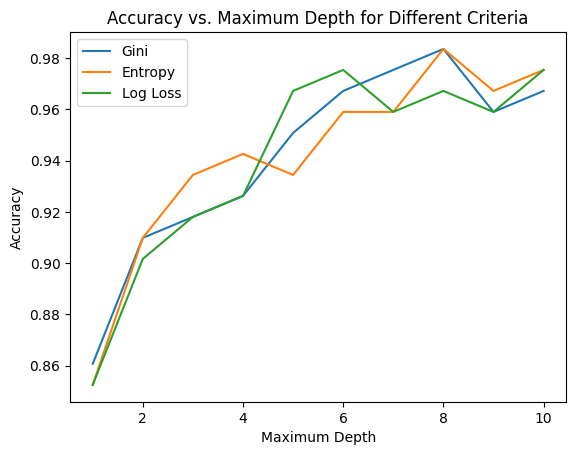

for criterion gini, maximum accuracy is achieved at depth: [85]
for criterion entropy, maximum accuracy is achieved at depth: [ 8 22 37 40 48 69 89 91 95]
for criterion log_loss, maximum accuracy is achieved at depth: [14 16 28 35 81 86]
for criterion gini, maximum accuracy is achieved at depth: [8]
for criterion entropy, maximum accuracy is achieved at depth: [8]
for criterion log_loss, maximum accuracy is achieved at depth: [ 6 10]
----------------------------------
Experiment 3 in progress...


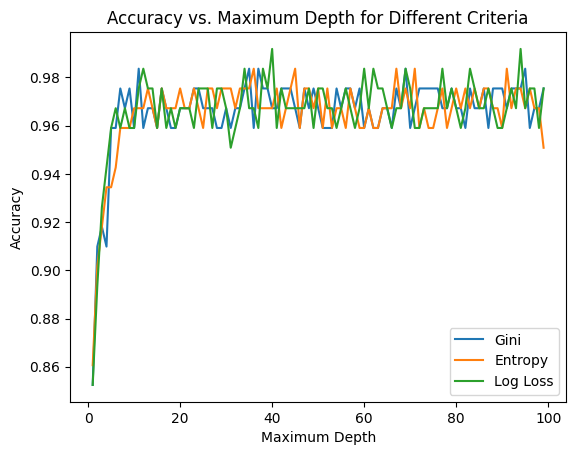

Maximum depth in forests for Gini Criterion: 10
Maximum depth in forests for Entropy Criterion: 10
Maximum depth in forests for Log Loss Criterion: 10


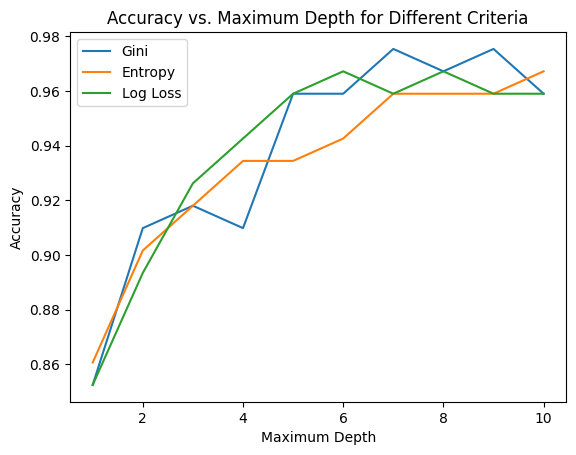

for criterion gini, maximum accuracy is achieved at depth: [11 35 37 69 95]
for criterion entropy, maximum accuracy is achieved at depth: [36 45 67 71 91]
for criterion log_loss, maximum accuracy is achieved at depth: [40 94]
for criterion gini, maximum accuracy is achieved at depth: [7 9]
for criterion entropy, maximum accuracy is achieved at depth: [10]
for criterion log_loss, maximum accuracy is achieved at depth: [6 8]
----------------------------------
Experiment 4 in progress...


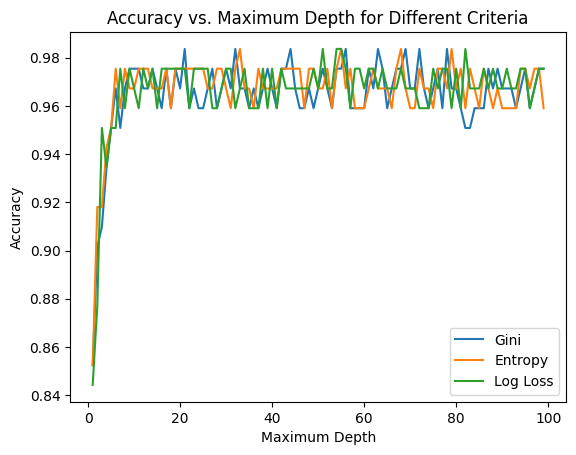

Maximum depth in forests for Gini Criterion: 10
Maximum depth in forests for Entropy Criterion: 10
Maximum depth in forests for Log Loss Criterion: 10


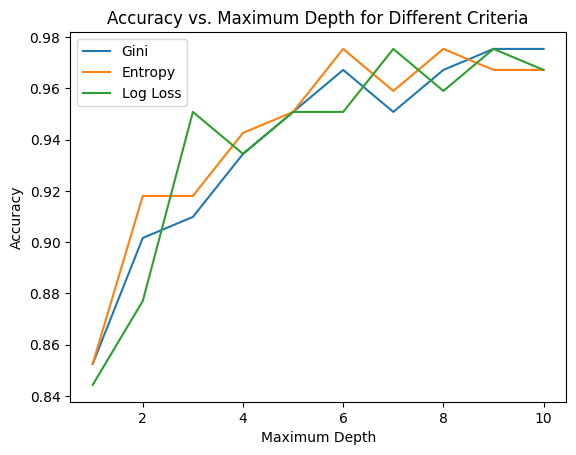

for criterion gini, maximum accuracy is achieved at depth: [21 32 44 56 63 69 72 78]
for criterion entropy, maximum accuracy is achieved at depth: [33 55 68 79]
for criterion log_loss, maximum accuracy is achieved at depth: [51 54 55 82]
for criterion gini, maximum accuracy is achieved at depth: [ 9 10]
for criterion entropy, maximum accuracy is achieved at depth: [6 8]
for criterion log_loss, maximum accuracy is achieved at depth: [7 9]
----------------------------------
Experiment 5 in progress...


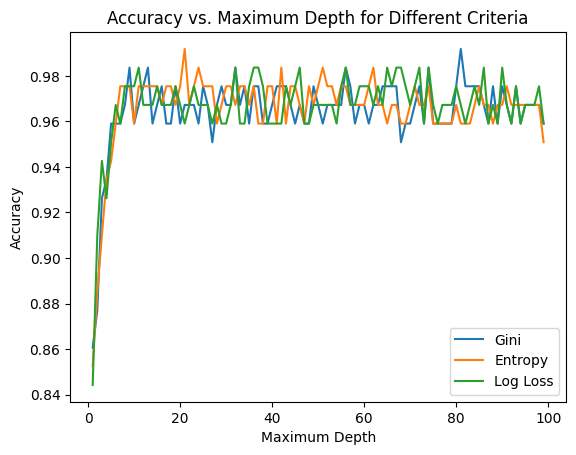

Maximum depth in forests for Gini Criterion: 10
Maximum depth in forests for Entropy Criterion: 10
Maximum depth in forests for Log Loss Criterion: 10


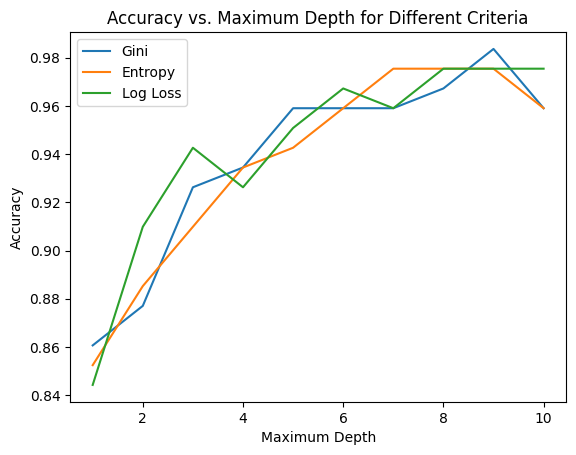

for criterion gini, maximum accuracy is achieved at depth: [81]
for criterion entropy, maximum accuracy is achieved at depth: [21]
for criterion log_loss, maximum accuracy is achieved at depth: [11 32 36 37 46 56 65 67 68 72 74 86 90]
for criterion gini, maximum accuracy is achieved at depth: [9]
for criterion entropy, maximum accuracy is achieved at depth: [7 8 9]
for criterion log_loss, maximum accuracy is achieved at depth: [ 8  9 10]


In [18]:
experiment_number = 5
experiment_results = {}

for n in range(experiment_number):

    print('----------------------------------')
    print(f'Experiment {n + 1} in progress...')

    forests_across_criterions = []
    accuracies_across_criterions = []
    criterions = ['gini', 'entropy', 'log_loss']
    for criterion in criterions:
        accuracies_across_depth = []
        forests_across_depths = []
        for depth in range(1, 100):
            clf = RandomForestClassifier(criterion=criterion, max_depth=depth, n_estimators = 100)
            clf.fit(X_train, np.ravel(y_train))
            y_pred = clf.predict(X_test)
            accuracies_across_depth.append(metrics.accuracy_score(y_test, y_pred))
            forests_across_depths.append(clf)

        accuracies_across_criterions.append(accuracies_across_depth)
        forests_across_criterions.append(forests_across_depths)


    plt.plot(range(1, 100), accuracies_across_criterions[0], label='Gini')
    plt.plot(range(1, 100), accuracies_across_criterions[1], label='Entropy')
    plt.plot(range(1, 100), accuracies_across_criterions[2], label='Log Loss')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Maximum Depth for Different Criteria')
    plt.legend()
    plt.show()

    max_depth_in_forests = []
    for forests_of_criterion in forests_across_criterions:
        max_depth = 0
        for forest in forests_of_criterion:
            for tree in forest.estimators_:
                max_depth = max(max_depth, tree.get_depth())
        max_depth_in_forests.append(max_depth)

    print('Maximum depth in forests for Gini Criterion:', max_depth_in_forests[0])
    print('Maximum depth in forests for Entropy Criterion:', max_depth_in_forests[1])
    print('Maximum depth in forests for Log Loss Criterion:', max_depth_in_forests[2])


    plt.plot(range(1, max_depth_in_forests[0] + 1), accuracies_across_criterions[0][0:10], label='Gini')
    plt.plot(range(1, max_depth_in_forests[1] + 1), accuracies_across_criterions[1][0:10], label='Entropy')
    plt.plot(range(1, max_depth_in_forests[2] + 1), accuracies_across_criterions[2][0:10], label='Log Loss')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Maximum Depth for Different Criteria')
    plt.legend()
    plt.show()


    max_acc_indexes = []
    for i, criterion_acc in enumerate(accuracies_across_criterions):
        max_acc_indexes.append(np.where(np.array(criterion_acc) == np.max(criterion_acc))[0])
        print(f'for criterion {criterions[i]}, maximum accuracy is achieved at depth: {max_acc_indexes[-1] + 1}')

    max_acc_indexes_depth_limited = []
    for i, criterion_acc in enumerate(accuracies_across_criterions):
        max_acc_indexes_depth_limited.append(np.where(np.array(criterion_acc[:max_depth_in_forests[i]]) == np.max(criterion_acc[:max_depth_in_forests[i]]))[0])
        print(f'for criterion {criterions[i]}, maximum accuracy is achieved at depth: {max_acc_indexes_depth_limited[-1] + 1}')

    experiment_results[n] = {
        'criterions': criterions,
        'accuracies_across_criterions': accuracies_across_criterions,
        'forests_across_criterions': forests_across_criterions,
        'max_depth_in_forests': max_depth_in_forests,
        'max_acc_indexes': max_acc_indexes,
        'max_acc_indexes_depth_limited': max_acc_indexes_depth_limited
    }

In [19]:
experiment_results[0].keys()

dict_keys(['criterions', 'accuracies_across_criterions', 'forests_across_criterions', 'max_depth_in_forests', 'max_acc_indexes', 'max_acc_indexes_depth_limited'])

In [20]:
for i, criterion in enumerate(criterions):

    print(f'for criterion {criterion}')

    mean_accuracy = np.mean([np.mean(experiment_results[j]['accuracies_across_criterions'][i]) for j in range(experiment_number)])
    mean_max_depth_in_forests = np.mean([experiment_results[j]['max_depth_in_forests'][i] for j in range(experiment_number)])
    mean_index_max_depth_limited = np.mean([np.mean(experiment_results[j]['max_acc_indexes_depth_limited'][i]) for j in range(experiment_number)])
    mean_index_max_depth = np.mean([np.mean(experiment_results[j]['max_acc_indexes'][i]) for j in range(experiment_number)])

    print('\tmean index where maximum accuracy is achieved with a limited depth:', mean_index_max_depth_limited)
    print('\tmean index where maximum accuracy is achieved:', mean_index_max_depth)
    print('\tmean maximum depth in forests:', mean_max_depth_in_forests)
    print('\tmean accuracy:', mean_accuracy)

for criterion gini
	mean index where maximum accuracy is achieved with a limited depth: 7.1
	mean index where maximum accuracy is achieved: 65.4661111111111
	mean maximum depth in forests: 10.0
	mean accuracy: 0.965904951150853
for criterion entropy
	mean index where maximum accuracy is achieved with a limited depth: 7.6
	mean index where maximum accuracy is achieved: 48.29888888888889
	mean maximum depth in forests: 10.0
	mean accuracy: 0.9665176353700945
for criterion log_loss
	mean index where maximum accuracy is achieved with a limited depth: 6.866666666666665
	mean index where maximum accuracy is achieved: 52.52271062271062
	mean maximum depth in forests: 10.0
	mean accuracy: 0.9664348402053322


## Important Feature Extraction

In [21]:
fearture_importances_across_criterions = []
for i, criterion in enumerate(criterions):

    print(f'for criterion {criterion}')
    feature_importance_lists = [np.array([forest.feature_importances_ for forest in experiment_results[j]['forests_across_criterions'][i]]) for j in range(experiment_number)]
    mean_feature_importance = np.mean(np.mean(feature_importance_lists, axis=0), axis=0)
    print('the imporatnce of features across experiments and forests:', mean_feature_importance)
    fearture_importances_across_criterions.append(mean_feature_importance)

for criterion gini
the imporatnce of features across experiments and forests: [0.04834149 0.07117265 0.07042902 0.07869136 0.12920663 0.16969667
 0.07520711 0.05332013 0.25102221 0.05291273]
for criterion entropy
the imporatnce of features across experiments and forests: [0.04904038 0.07523417 0.07302577 0.08373834 0.14887956 0.15179898
 0.07877116 0.0582994  0.22401022 0.05720201]
for criterion log_loss
the imporatnce of features across experiments and forests: [0.04912457 0.07554071 0.07250256 0.08336361 0.14837268 0.15212538
 0.07900979 0.05831462 0.22411068 0.05753538]


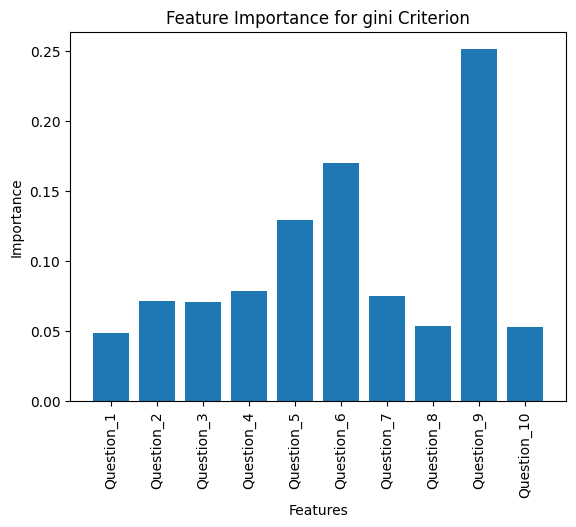

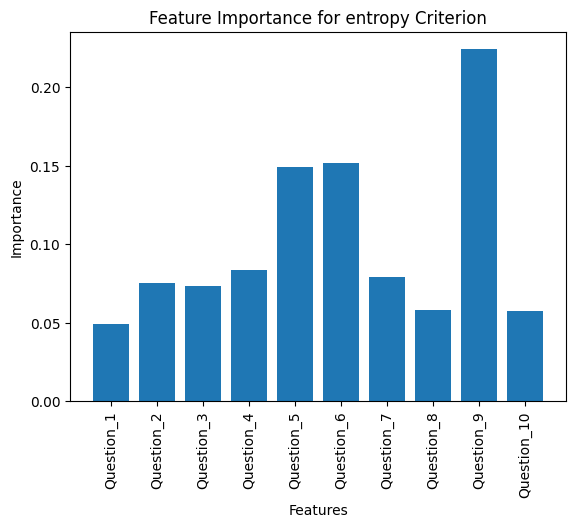

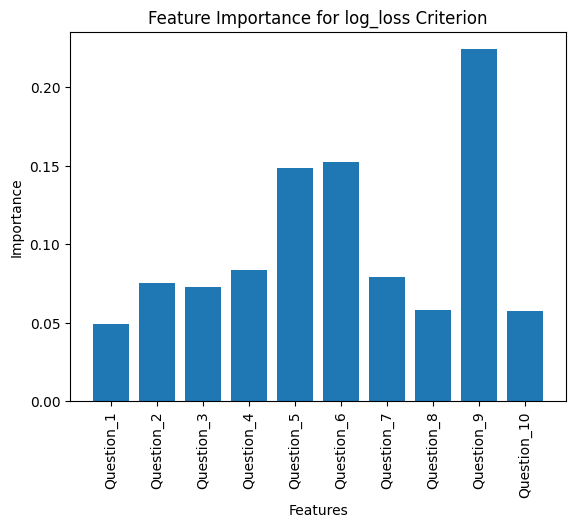

In [22]:
for i, criterion in enumerate(criterions):
    plt.bar(range(len(fearture_importances_across_criterions[i])), fearture_importances_across_criterions[i], tick_label=feature_list)
    plt.title(f'Feature Importance for {criterion} Criterion')
    plt.xlabel('Features')
    plt.xticks(rotation=90)
    plt.ylabel('Importance')
    plt.show()

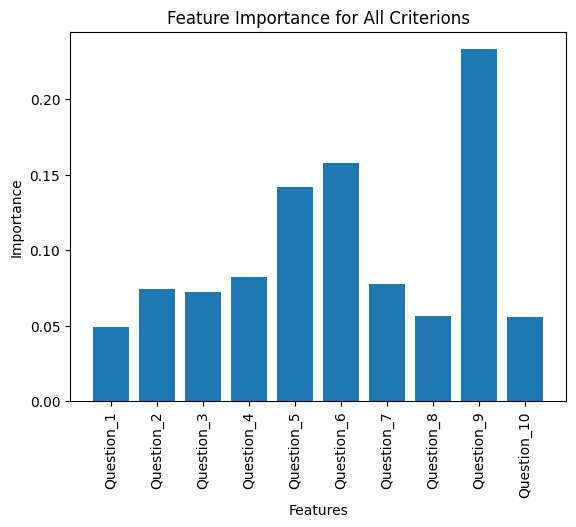

In [23]:
plt.bar(range(10), np.mean(fearture_importances_across_criterions, axis=0), tick_label=feature_list)
plt.title(f'Feature Importance for All Criterions')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.show()

In [24]:
print('Questions sorted based on their importance:')
print(np.mean(fearture_importances_across_criterions, axis=0).argsort()[::-1] + 1)

Questions sorted based on their importance:
[ 9  6  5  4  7  2  3  8 10  1]


## Trees and Forests comparisons

----------------------------------
Experiment 1 in progress...


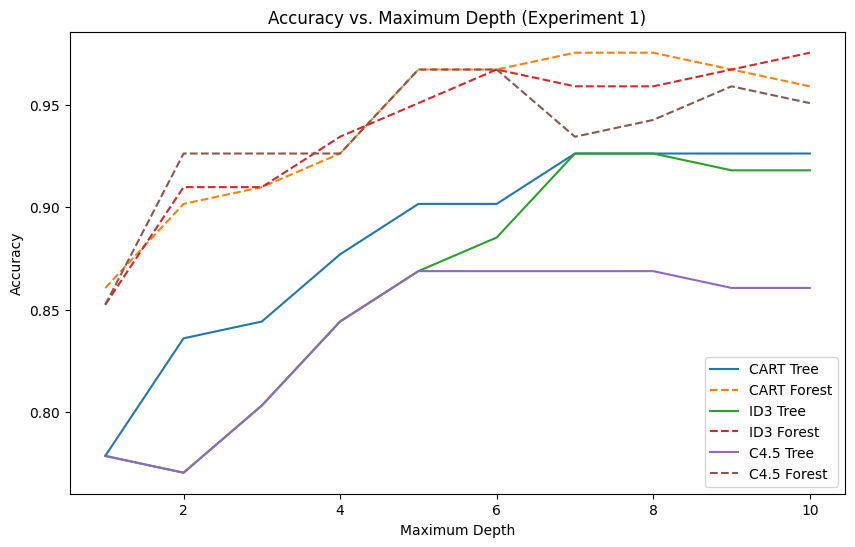

CART - Max Accuracy: 0.9262 at Depth: 7
Random Forest - Max Accuracy: 0.9754 at Depth: 7
ID3 - Max Accuracy: 0.9262 at Depth: 7
Random Forest - Max Accuracy: 0.9754 at Depth: 10
C4.5 - Max Accuracy: 0.8689 at Depth: 5
Random Forest - Max Accuracy: 0.9672 at Depth: 5
----------------------------------
Experiment 2 in progress...


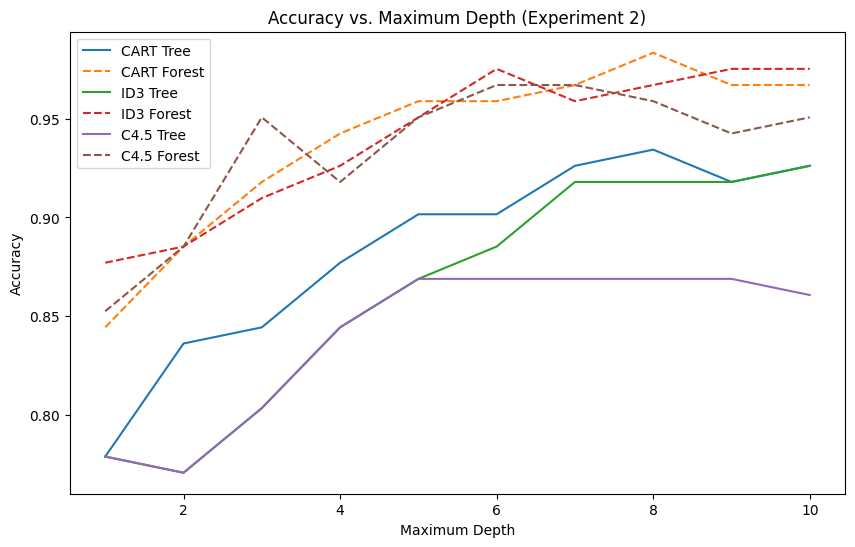

CART - Max Accuracy: 0.9344 at Depth: 8
Random Forest - Max Accuracy: 0.9836 at Depth: 8
ID3 - Max Accuracy: 0.9262 at Depth: 10
Random Forest - Max Accuracy: 0.9754 at Depth: 6
C4.5 - Max Accuracy: 0.8689 at Depth: 5
Random Forest - Max Accuracy: 0.9672 at Depth: 6
----------------------------------
Experiment 3 in progress...


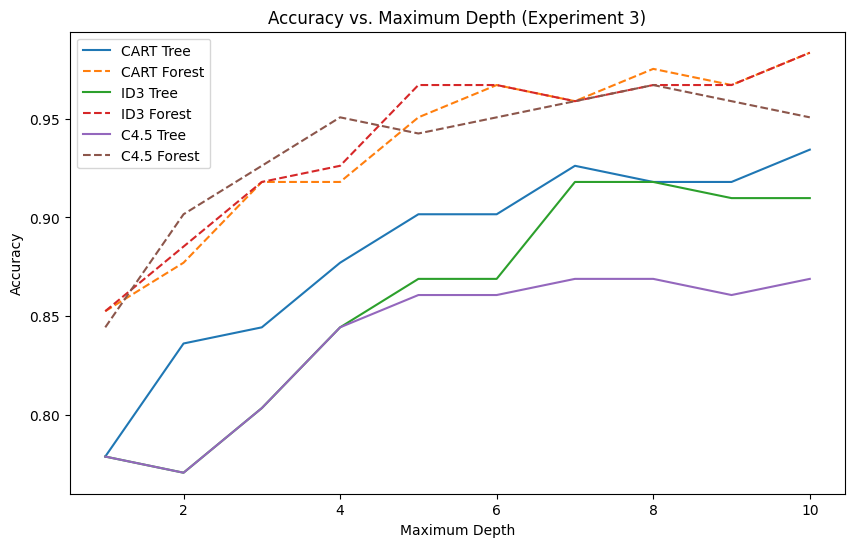

CART - Max Accuracy: 0.9344 at Depth: 10
Random Forest - Max Accuracy: 0.9836 at Depth: 10
ID3 - Max Accuracy: 0.9180 at Depth: 7
Random Forest - Max Accuracy: 0.9836 at Depth: 10
C4.5 - Max Accuracy: 0.8689 at Depth: 7
Random Forest - Max Accuracy: 0.9672 at Depth: 8
----------------------------------
Experiment 4 in progress...


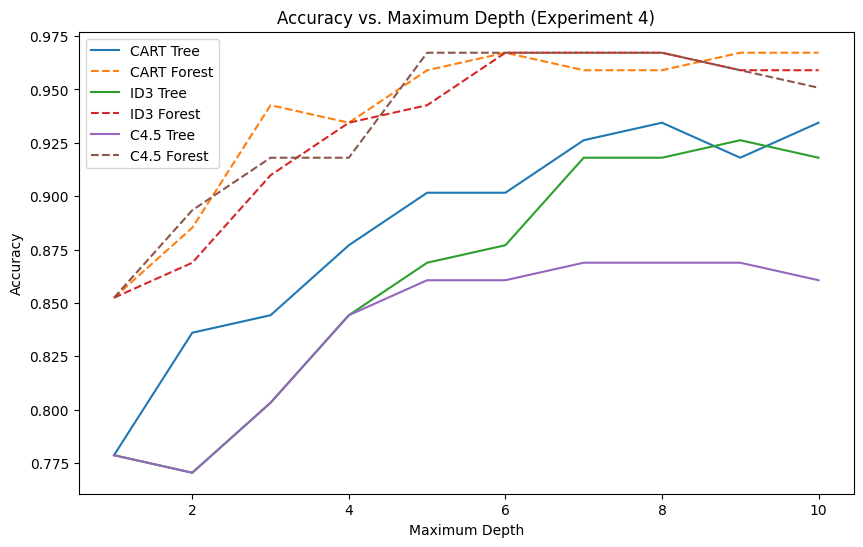

CART - Max Accuracy: 0.9344 at Depth: 8
Random Forest - Max Accuracy: 0.9672 at Depth: 6
ID3 - Max Accuracy: 0.9262 at Depth: 9
Random Forest - Max Accuracy: 0.9672 at Depth: 6
C4.5 - Max Accuracy: 0.8689 at Depth: 7
Random Forest - Max Accuracy: 0.9672 at Depth: 5
----------------------------------
Experiment 5 in progress...


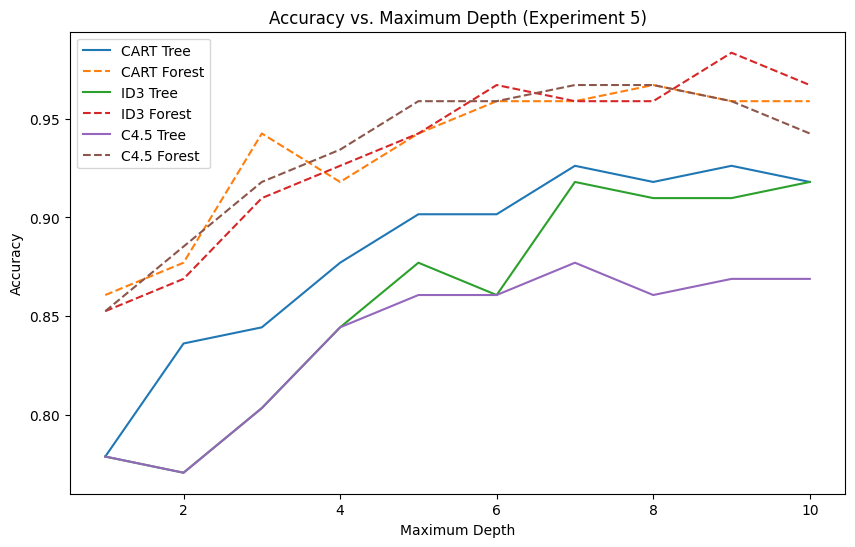

CART - Max Accuracy: 0.9262 at Depth: 7
Random Forest - Max Accuracy: 0.9672 at Depth: 8
ID3 - Max Accuracy: 0.9180 at Depth: 7
Random Forest - Max Accuracy: 0.9836 at Depth: 9
C4.5 - Max Accuracy: 0.8770 at Depth: 7
Random Forest - Max Accuracy: 0.9672 at Depth: 7


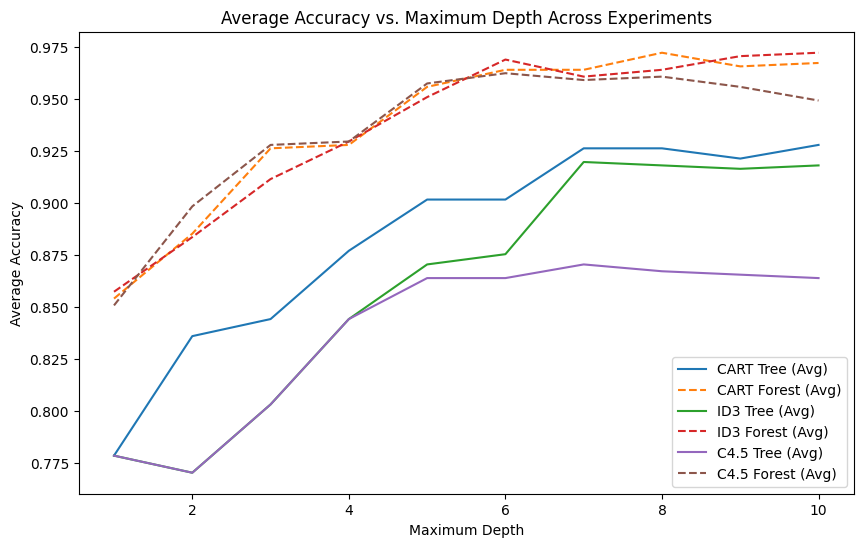

In [25]:
experiment_number = 5
experiment_results = {}

for n in range(experiment_number):

    print('----------------------------------')
    print(f'Experiment {n + 1} in progress...')

    # Comparing CART, ID3, C4.5, and Random Forest
    types = ['CART', 'ID3', 'C4.5']
    types = ['CART', 'ID3', 'C4.5']
    forests = {forest: [] for forest in types}
    trees = {tree: [] for tree in types}
    tree_accuracies = {tree_type: [] for tree_type in types}
    forest_accuracies = {forest_type: [] for forest_type in types}

    for depth in range(1, 11):  # Test depths from 1 to 10
        # CART (Gini)
        cart_clf = DecisionTreeClassifier(criterion='gini', max_depth=depth)
        cart_clf.fit(X_train, np.ravel(y_train))
        cart_pred = cart_clf.predict(X_test)
        tree_accuracies['CART'].append(metrics.accuracy_score(y_test, cart_pred))
        trees['CART'].append(cart_clf)

        # ID3 (Entropy)
        id3_clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
        id3_clf.fit(X_train, np.ravel(y_train))
        id3_pred = id3_clf.predict(X_test)
        tree_accuracies['ID3'].append(metrics.accuracy_score(y_test, id3_pred))
        trees['ID3'].append(id3_clf)

        # C4.5 Approximation (Entropy + Gain Ratio Post-Pruning Simulation)
        c45_clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, min_samples_leaf=5)
        c45_clf.fit(X_train, np.ravel(y_train))
        c45_pred = c45_clf.predict(X_test)
        tree_accuracies['C4.5'].append(metrics.accuracy_score(y_test, c45_pred))
        trees['C4.5'].append(c45_clf)

        # Random Forests (CART with default 100 estimators)
        cart_rf_clf = RandomForestClassifier(criterion='gini', max_depth=depth, n_estimators=100)
        cart_rf_clf.fit(X_train, np.ravel(y_train))
        rf_pred = cart_rf_clf.predict(X_test)
        forest_accuracies['CART'].append(metrics.accuracy_score(y_test, rf_pred))
        forests['CART'].append(cart_rf_clf)

        # Random Forests (ID3 with default 100 estimators)
        id3_rf_clf = RandomForestClassifier(criterion='entropy', max_depth=depth, n_estimators=100)
        id3_rf_clf.fit(X_train, np.ravel(y_train))
        rf_pred = id3_rf_clf.predict(X_test)
        forest_accuracies['ID3'].append(metrics.accuracy_score(y_test, rf_pred))
        forests['ID3'].append(id3_rf_clf)

        # Random Forests (C4.5 with default 100 estimators)
        c45_rf_clf = RandomForestClassifier(criterion='entropy', max_depth=depth, min_samples_leaf=5)
        c45_rf_clf.fit(X_train, np.ravel(y_train))
        rf_pred = c45_rf_clf.predict(X_test)
        forest_accuracies['C4.5'].append(metrics.accuracy_score(y_test, rf_pred))
        forests['C4.5'].append(c45_rf_clf)

    # Plot results for each type of tree
    plt.figure(figsize=(10, 6))
    for tree_type in types:
        plt.plot(range(1, 11), tree_accuracies[tree_type], label=f'{tree_type} Tree')
        plt.plot(range(1, 11), forest_accuracies[tree_type], label=f'{tree_type} Forest', linestyle='--')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs. Maximum Depth (Experiment {n + 1})')
    plt.legend()
    plt.show()

    # Find maximum accuracy and corresponding depth for each method
    for tree_type in types:
        max_acc = max(tree_accuracies[tree_type])
        best_depth = tree_accuracies[tree_type].index(max_acc) + 1
        print(f'{tree_type} - Max Accuracy: {max_acc:.4f} at Depth: {best_depth}')

        max_rf_acc = max(forest_accuracies[tree_type])
        best_rf_depth = forest_accuracies[tree_type].index(max_rf_acc) + 1
        print(f'Random Forest - Max Accuracy: {max_rf_acc:.4f} at Depth: {best_rf_depth}')

    # Save experiment results
    experiment_results[n] = {
        'tree_accuracies': tree_accuracies,
        'forest_accuracies': forest_accuracies,
        'forests': forests,
        'trees': trees
    }

# Summary of results across experiments
avg_tree_accuracies = {tree_type: np.mean([res['tree_accuracies'][tree_type] for res in experiment_results.values()], axis=0) for tree_type in types}
avg_forest_accuracies = {forest_type: np.mean([res['forest_accuracies'][forest_type] for res in experiment_results.values()], axis=0) for forest_type in types}

plt.figure(figsize=(10, 6))
for tree_type in types:
    plt.plot(range(1, 11), avg_tree_accuracies[tree_type], label=f'{tree_type} Tree (Avg)')
    plt.plot(range(1, 11), avg_forest_accuracies[tree_type], label=f'{tree_type} Forest (Avg)', linestyle='--')
plt.xlabel('Maximum Depth')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs. Maximum Depth Across Experiments')
plt.legend()
plt.show()


In [26]:
print('---------Trees---------')
for criterion, acc_arr in avg_tree_accuracies.items():
    max_acc = max(acc_arr)
    best_depth = list(acc_arr).index(max_acc) + 1
    print(f'{criterion} - Max Accuracy: {max_acc:.4f} at Depth: {best_depth}')
print()
print('---------Forests---------')
for criterion, acc_arr in avg_forest_accuracies.items():
    max_acc = max(acc_arr)
    best_depth = list(acc_arr).index(max_acc) + 1
    print(f'{criterion} - Max Accuracy: {max_acc:.4f} at Depth: {best_depth}')

---------Trees---------
CART - Max Accuracy: 0.9279 at Depth: 10
ID3 - Max Accuracy: 0.9197 at Depth: 7
C4.5 - Max Accuracy: 0.8705 at Depth: 7

---------Forests---------
CART - Max Accuracy: 0.9721 at Depth: 8
ID3 - Max Accuracy: 0.9721 at Depth: 10
C4.5 - Max Accuracy: 0.9623 at Depth: 6


## Important Feature Extraction Across Trees and forests

In [27]:
# Initialize dictionaries to store important features across experiments
important_features_across_experiments_trees = {tree_type: [] for tree_type in types}
important_features_across_experiments_forests = {tree_type: [] for tree_type in types}

# Collect feature importances from trees and forests across experiments
for n in range(experiment_number):
    for tree_type in types:
        # For trees
        for tree in experiment_results[n]['trees'][tree_type]:
            important_features_across_experiments_trees[tree_type].append(tree.feature_importances_)

        # For forests
        for forest in experiment_results[n]['forests'][tree_type]:
            for tree in forest.estimators_:  # Access individual trees in the forest
                important_features_across_experiments_forests[tree_type].append(tree.feature_importances_)

# Calculate average feature importance for each tree type
avg_tree_accuracies = {
    tree_type: np.mean(
        [tree.feature_importances_ for experiment in experiment_results.values() for tree in experiment['trees'][tree_type]],
        axis=0
    )
    for tree_type in types
}
print("Average Tree Feature Importances Across Experiments:", avg_tree_accuracies)

# Calculate average feature importance for each forest type
avg_forest_accuracies = {
    tree_type: np.mean(
        [tree.feature_importances_ for experiment in experiment_results.values() for tree in experiment['forests'][tree_type]],
        axis=0
    )
    for tree_type in types
}
print("Average Forest Feature Importances Across Experiments:", avg_forest_accuracies)

Average Tree Feature Importances Across Experiments: {'CART': array([0.05899406, 0.05422986, 0.02680738, 0.03598961, 0.03948384,
       0.08541936, 0.0459379 , 0.0425842 , 0.58665719, 0.0238966 ]), 'ID3': array([0.03403707, 0.08393248, 0.03846986, 0.03183967, 0.09023218,
       0.0696963 , 0.0827757 , 0.03806489, 0.51125871, 0.01969314]), 'C4.5': array([0.02168684, 0.09172203, 0.03282083, 0.0217254 , 0.09687283,
       0.06636646, 0.07713457, 0.0317913 , 0.54265193, 0.01722782])}
Average Forest Feature Importances Across Experiments: {'CART': array([0.03499487, 0.05449104, 0.06696006, 0.07921563, 0.14558314,
       0.19709462, 0.06084467, 0.0335596 , 0.28300606, 0.04425033]), 'ID3': array([0.03666071, 0.05726749, 0.06701995, 0.07941765, 0.17234812,
       0.17190964, 0.06228335, 0.03955511, 0.26229393, 0.05124405]), 'C4.5': array([0.02582308, 0.05300126, 0.06527866, 0.08262616, 0.19060097,
       0.17647729, 0.05401364, 0.02950747, 0.27648024, 0.04619125])}


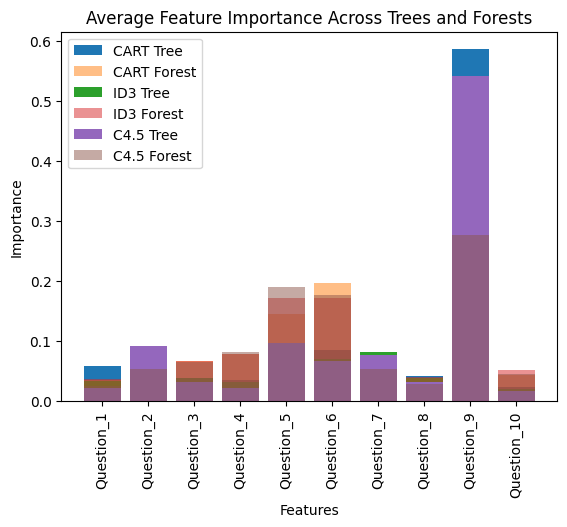

In [28]:
for tree_type in types:
    plt.bar(range(len(avg_tree_accuracies[tree_type])), avg_tree_accuracies[tree_type], tick_label=feature_list, label=f'{tree_type} Tree')
    plt.bar(range(len(avg_forest_accuracies[tree_type])), avg_forest_accuracies[tree_type], tick_label=feature_list, label=f'{tree_type} Forest', alpha=0.5)


plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Average Feature Importance Across Trees and Forests')
plt.legend()
plt.show()

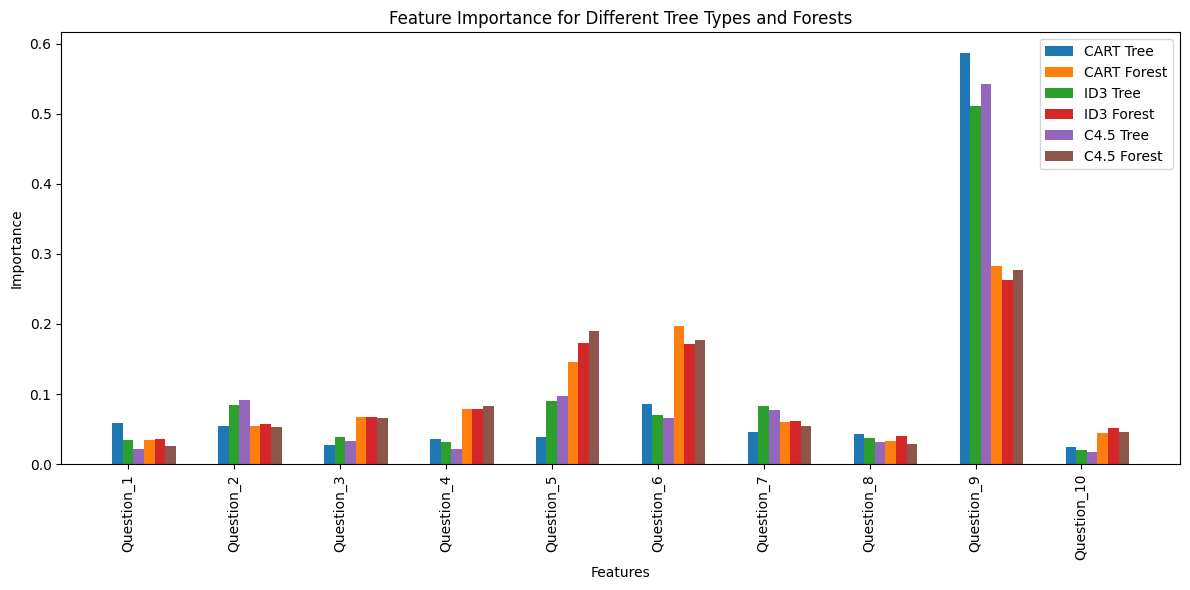

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming feature_list contains feature names and avg_tree_accuracies/avg_forest_accuracies are dictionaries
num_features = len(feature_list)
x = np.arange(num_features)  # Base x positions for features
width = 0.1  # Width of each bar

# Plot bars for tree and forest accuracies side by side
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed

for i, tree_type in enumerate(types):
    # Offset x positions for each tree type
    tree_bar_positions = x + i * width
    forest_bar_positions = x + (i + len(types)) * width

    # Plot tree feature importances
    ax.bar(
        tree_bar_positions,
        avg_tree_accuracies[tree_type],
        width=width,
        label=f'{tree_type} Tree'
    )

    # Plot forest feature importances
    ax.bar(
        forest_bar_positions,
        avg_forest_accuracies[tree_type],
        width=width,
        label=f'{tree_type} Forest'
    )

# Configure plot
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importance for Different Tree Types and Forests')
ax.set_xticks(x + (len(types) - 1) * width / 2)  # Center x-ticks
ax.set_xticklabels(feature_list, rotation=90)  # Rotate feature labels
ax.legend()  # Add legend

plt.tight_layout()  # Ensure no overlap of labels
plt.show()


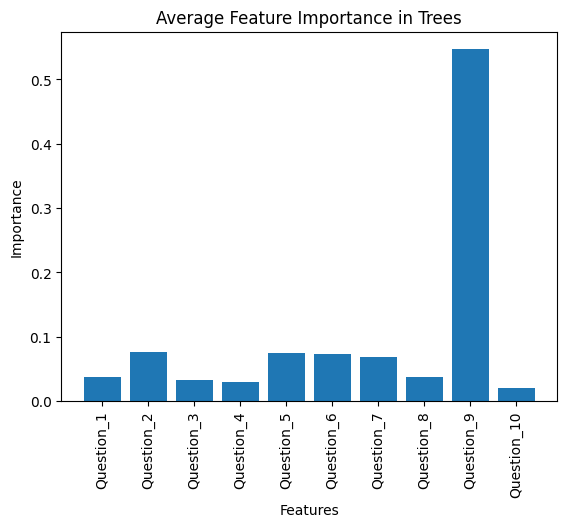

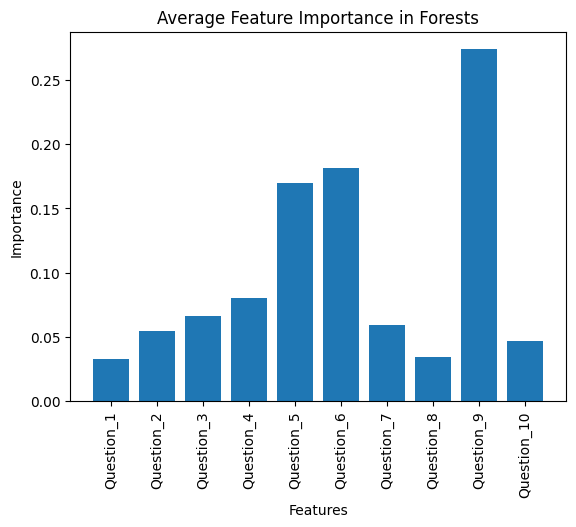

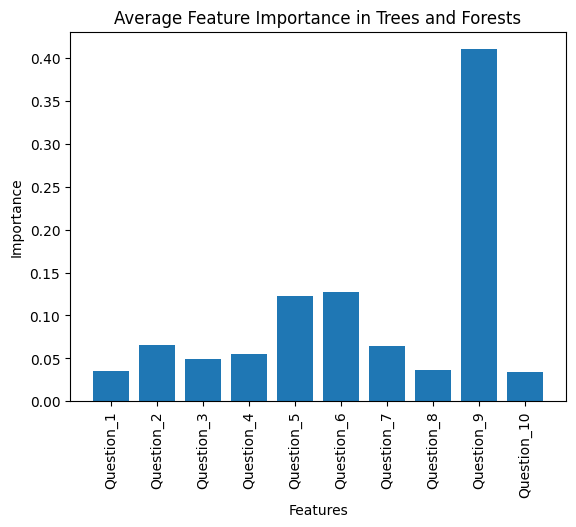

In [30]:
avg_feature_importance_trees = np.mean(np.mean([list(v) for v in important_features_across_experiments_trees.values()], axis=1), axis=0)
plt.bar(range(10), avg_feature_importance_trees, tick_label=feature_list)
plt.title(f'Average Feature Importance in Trees')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.show()

avg_feature_importance_forests = np.mean(np.mean([list(v) for v in important_features_across_experiments_forests.values()], axis=1), axis=0)
plt.bar(range(10), avg_feature_importance_forests, tick_label=feature_list)
plt.title(f'Average Feature Importance in Forests')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.show()


avg_feature_importance = np.mean([avg_feature_importance_trees, avg_feature_importance_forests], axis=0)
plt.bar(range(10), avg_feature_importance, tick_label=feature_list)
plt.title(f'Average Feature Importance in Trees and Forests')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.show()

In [31]:
print('Questions sorted based on their importance:')
print(avg_feature_importance.argsort()[::-1] + 1)

Questions sorted based on their importance:
[ 9  6  5  2  7  4  3  8  1 10]
